In [26]:
import pandas as pd
import numpy as np
import itertools
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [4]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [14]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
grouping = insurance.columns.to_series().groupby(insurance.dtypes).groups
grouping

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [ ]:
datatype = {k.name: v for k, v in g.items()}

attributes_by_datatype = pd.DataFrame(list(dt.values()), index = dt.keys(), columns = ['Attr 1', 'Attr 2', 'Attr 3'])
attributes_by_datatype

In [ ]:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

In [17]:
# Encoding sex coulmn

insurance.replace({"sex": {"female": 0, "male": 1}}, inplace = True)

# Encoding smoker column

insurance.replace({"smoker": {"no": 0, "yes": 1}}, inplace = True)

# Encoding region column

insurance.replace({"region": {"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3}}, inplace = True)


In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

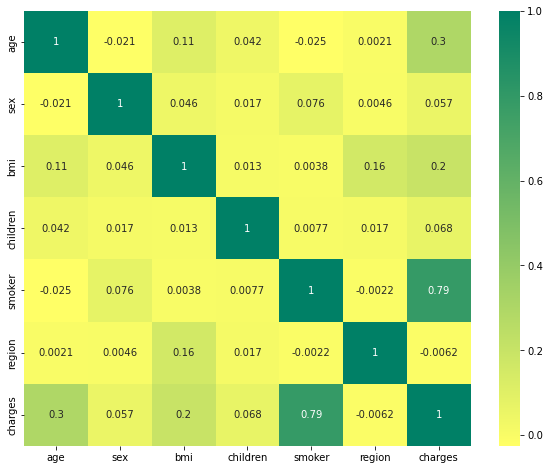

In [19]:
corr = insurance.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')                          

In [ ]:
Langkah #5 - Pengujian Hipotesis

In [47]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

Ho = "Tagihan perokok dan non perokok sama"   
Ha = "Tagihan perokok dan non perokok tidak sama"

nonPerokok = insurance[insurance["smoker"] == 0]
perokok = insurance[insurance["smoker"] == 1]
tagihan_nonPerokok = nonPerokok["charges"]
tagihan_perokok = perokok["charges"]

print(f'Jumlah perokok adalah : {perokok.shape[0]}')
print(f'Variance tagihan perokok adalah : {np.var(tagihan_perokok)}')
print(f'Jumlah non perokok adalah : {nonPerokok.shape[0]}')
print(f'Variance tagihan non perokok adalah: {np.var(tagihan_nonPerokok)}')

Jumlah perokok adalah : 274
Variance tagihan perokok adalah : 132721153.13625304
Jumlah non perokok adalah : 1064
Variance tagihan non perokok adalah: 35891656.00316425


In [48]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(tagihan_perokok, tagihan_nonPerokok, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 32.751887766341824
p_value: 5.88946444671698e-103


In [ ]:
reject null hyphothesis

In [36]:
# 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

Ho = "Tagihan kesehatan BMI diatas 25 dan dibawah 25 sama"   
Ha = "Tagihan kesehatan BMI diatas 25 dan dibawah 25 tidak sama"

x = np.array(insurance[insurance.bmi > 25].charges) 
y = np.array(insurance[insurance.bmi < 25].charges)

# jelaskan mengapa menggunakan independet t-test

# performing an independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)
print("p-value = %.6f" % (p_value))

1.7916455594610296e-05
p-value = 0.000018


In [ ]:
reject null hypothesis

In [49]:
Ho = "Tagihan kesehatan BMI diatas 25 dan dibawah 25 sama"   
Ha = "Tagihan kesehatan BMI diatas 25 dan dibawah 25 tidak sama"

bmi_lebih_25 = insurance[insurance["bmi"] > 25]
bmi_kurang_25 = insurance[insurance["bmi"] < 25]
tagihan_lebih_25 = bmi_lebih_25["charges"]
tagihan_kurang_25 = bmi_kurang_25["charges"]

print(f'Jumlah bmi lebih dari 25 adalah : {bmi_lebih_25.shape[0]}')
print(f'Variance tagihan bmi lebih dari 25 adalah : {np.var(tagihan_lebih_25)}')
print(f'Jumlah bmi kurang dari adalah : {bmi_kurang_25.shape[0]}')
print(f'Variance tagihan bmi kurang dari adalah: {np.var(tagihan_kurang_25)}')

Jumlah bmi lebih dari 25 adalah : 1091
Variance tagihan bmi lebih dari 25 adalah : 164579189.5213265
Jumlah bmi kurang dari adalah : 245
Variance tagihan bmi kurang dari adalah: 56326859.63068615


In [50]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(tagihan_lebih_25, tagihan_kurang_25, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 5.929878344096734
p_value: 5.080897303161378e-09


In [ ]:
reject null hypothesis

In [56]:
# 3  BMI laki-laki dan perempuan sama

Ho = "BMI laki-laki dan perempuan sama"                                                                    
Ha = "BMI laki-laki dan perempuan tidak sama"

laki = insurance[insurance['sex'] == 1]
perempuan = insurance[insurance['sex'] == 0]
bmi_laki = laki['bmi']
bmi_perempuan = perempuan['bmi']

print(f'Jumlah laki-laki adalah : {laki.shape[0]}')
print(f'Variance bmi laki-laki adalah : {np.var(bmi_laki)}')
print(f'Jumlah perempuan adalah: {perempuan.shape[0]}')
print(f'Variance bmi perempuan adalah: {np.var(bmi_perempuan)}')


Jumlah laki-laki adalah : 676
Variance bmi laki-laki adalah : 37.6491607363954
Jumlah perempuan adalah: 662
Variance bmi perempuan adalah: 36.49917703379856


In [57]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(bmi_laki, bmi_perempuan, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 1.697027933124022
p_value: 0.08992430667834876


In [ ]:
gagal tolak null hypothesis